In [62]:
import hdbscan
# from ortools.linear_solver import pywraplp
# from ortools.sat.python import cp_model
from search_engine.trip_planner.trip_classes.Item import Item
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans,DBSCAN
# from k_means_constrained import KMeansConstrained
# import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import json,requests

In [2]:
items = [Item("hotel",{"name":"","id":"247869","coordinate":{'lat': 52.515915, 'lon': 13.394078},"guestrating":"9.2"}),
                            Item("food",{"name":"","id":"N6121773112","coordinate":{'lat': 52.516552, 'lon': 13.403493},"guestrating":"7"}),
                            Item("food",{"name":"","id":"N1433120469","coordinate":{'lat': 52.519344, 'lon': 13.4025},"guestrating":"7"}),
                            Item("food",{"name":"","id":"Q869943","coordinate":{'lat': 52.513332, 'lon': 13.405833},"guestrating":"7"}),
                            Item("food",{"name":"","id":"N1244644982","coordinate":{'lat': 52.51564, 'lon': 13.406953},"guestrating":"7"}),
                            Item("food",{"name":"","id":"N622642560","coordinate":{'lat': 52.523018, 'lon': 13.388484},"guestrating":"7"}),
                            Item("food",{"name":"","id":"N89275075","coordinate":{'lat': 52.518013, 'lon': 13.407163},"guestrating":"7"}),
                            Item("food",{"name":"","id":"W48118905","coordinate":{'lat': 52.508587, 'lon': 13.38711},"guestrating":"7"}),
                            Item("food",{"name":"","id":"N2607087946","coordinate":{'lat': 52.518829, 'lon': 13.408701},"guestrating":"7"}),
                            Item("food",{"name":"","id":"N615149024","coordinate":{'lat': 52.523933, 'lon': 13.402408},"guestrating":"7"}),
                            Item("shop",{"name":"","id":"Q1901032","coordinate":{'lat': 52.519199, 'lon': 13.3836},"guestrating":"7"}),
                            Item("shop",{"name":"","id":"Q1901029","coordinate":{'lat': 52.508099, 'lon': 13.3881},"guestrating":"7"}),
                            Item("shop",{"name":"","id":"N1714250170","coordinate":{'lat': 52.522987, 'lon': 13.382868},"guestrating":"7"}),
                            Item("historic",{"name":"","id":"N262455591","coordinate":{'lat': 52.517254, 'lon': 13.392743},"guestrating":"7"}),
                            Item("historic",{"name":"","id":"N3058015348","coordinate":{'lat': 52.517815, 'lon': 13.393262},"guestrating":"7"}),
                            Item("historic",{"name":"","id":"N262457570","coordinate":{'lat': 52.513638, 'lon': 13.392648},"guestrating":"7"}),
                            Item("cultural",{"name":"","id":"W205728152","coordinate":{'lat': 52.516487, 'lon': 13.393826},"guestrating":"7"}),
                            Item("cultural",{"name":"","id":"W15976892","coordinate":{'lat': 52.516705, 'lon': 13.394738},"guestrating":"7"}),
                            Item("cultural",{"name":"","id":"N262455591","coordinate":{'lat': 52.517254, 'lon': 13.392743},"guestrating":"7"}),
                            Item("cultural",{"name":"","id":"N437319063","coordinate":{'lat': 52.517593, 'lon': 13.393472},"guestrating":"7"}),
                            Item("cultural",{"name":"","id":"N3058015349","coordinate":{'lat': 52.517849, 'lon': 13.39373},"guestrating":"7"}),
                            Item("sport",{"name":"","id":"R5758790","coordinate":{'lat': 52.529545, 'lon': 13.39354},"guestrating":"7"}),
                            Item("architecture",{"name":"","id":"Q435399","coordinate":{'lat': 52.516399, 'lon': 13.3933},"guestrating":"7"}),
                            Item("architecture",{"name":"","id":"Q439297","coordinate":{'lat': 52.516899, 'lon': 13.3928},"guestrating":"7"}),
                            Item("architecture",{"name":"","id":"Q1540327","coordinate":{'lat': 52.516899, 'lon': 13.3921},"guestrating":"7"}),
                            Item("architecture",{"name":"","id":"Q2110747","coordinate":{'lat': 52.516899, 'lon': 13.3961},"guestrating":"7"}),
                            Item("architecture",{"name":"","id":"Q806775","coordinate":{'lat': 52.5144, 'lon': 13.3955},"guestrating":"7"}),]

In [3]:
data = pd.DataFrame({
#     'id':[item.item_id for item in items],
                     'lat':[item.coordinate['lat'] for item in items],
                    'lon':[item.coordinate['lon'] for item in items]})
data


,lat,lon
0,52.515915,13.394078
1,52.516552,13.403493
2,52.519344,13.402500
3,52.513332,13.405833
4,52.515640,13.406953
5,52.518013,13.407163
6,52.518829,13.408701
7,52.523933,13.402408
8,52.529545,13.393540
9,52.523018,13.388484


In [66]:
kmeans = KMedoids(n_clusters=len(items)//5,metric='haversine')
data['label'] = kmeans.fit_predict(data[['lat','lon']].values)
sorted_data = data.sort_values(by='label')


In [67]:
# kmeans.labels_

In [69]:
data

,lat,lon,label
0,52.515915,13.394078,2
1,52.516552,13.403493,3
2,52.519344,13.402500,3
3,52.513332,13.405833,3
4,52.515640,13.406953,3
5,52.518013,13.407163,3
6,52.518829,13.408701,3
7,52.523933,13.402408,3
8,52.529545,13.393540,1
9,52.523018,13.388484,1


In [70]:
# centers = kmeans.cluster_centers_

<AxesSubplot:xlabel='lat', ylabel='lon'>

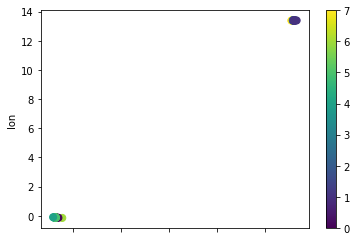

In [71]:
data.plot.scatter(x = 'lat', y = 'lon', c=data['label'], s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [72]:
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]


In [ ]:

# [print(f"{d['lat']},{d['label']},") for i,d in sorted_data.iterrows()]
sorted_data

In [74]:
import folium

In [75]:
m = folium.Map(location=[51.529412,-0.125847])

In [76]:
[folium.Marker(
    location=[item['lat'],item['lon']],
    icon=folium.Icon(color=colors[int(item['label'])]),
    tooltip=item['label']
).add_to(m)  for i,item in data.iterrows()]

In [78]:

folium.PolyLine(locations=data[['lat','lon']],weight=5).add_to(m)
m

In [41]:
[print(f"{d['lat']},{d['lon']},") for s,d in data.iterrows()]
# folium.PolyLine(locations=[[item['lat'],item['lon']] for i,item in sorted_data.iterrows() ],weight=5).add_to(m)
# m

51.526623,-0.131859,
51.526886,-0.137008,
51.528084,-0.138928,
51.527199,-0.1326,
51.527199,-0.1326,
51.525036,-0.129,
52.516399,13.3933,
52.517849,13.39373,
52.517593,13.393472,
52.517254,13.392743,
52.516705,13.394738,
52.5144,13.3955,
52.516899,13.3921,
52.516899,13.3928,
52.515915,13.394078,
52.516899,13.3961,
52.517815,13.393262,
52.517254,13.392743,
52.513638,13.392648,
52.516487,13.393826,
51.534748,-0.138165,
51.540443,-0.140816,
52.523933,13.402408,
52.518829,13.408701,
52.518013,13.407163,
52.51564,13.406953,
52.513332,13.405833,
52.519344,13.4025,
52.516552,13.403493,
51.523998,-0.124,
51.522205,-0.11887,
51.523045,-0.119031,
51.523998,-0.124,
51.556442,-0.151267,
51.528999,-0.1255,
51.529598,-0.128129,
51.53537,-0.130883,
51.528801,-0.129,
51.530228,-0.12801,
51.529877,-0.12772,
51.527451,-0.128528,
51.532394,-0.125386,
51.528236,-0.128996,
51.529412,-0.125847,
51.530228,-0.12801,
51.528236,-0.128996,
51.531086,-0.120813,
52.529545,13.39354,
52.523018,13.388484,
52.519199,1

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [145]:
items =  [Item("hotel",{"name":"","id":"247869","coordinate":{'lat': 52.515915, 'lon': 13.394078},"guestrating":"9.2"}),
                       Item("food",{"name":"","id":"N6121773112","coordinate":{'lat': 52.516552, 'lon': 13.403493},"guestrating":"7"}),
                       Item("food",{"name":"","id":"N1433120469","coordinate":{'lat': 52.519344, 'lon': 13.4025},"guestrating":"7"}),
                       Item("food",{"name":"","id":"Q869943","coordinate":{'lat': 52.513332, 'lon': 13.405833},"guestrating":"7"}),
                       Item("food",{"name":"","id":"N1244644982","coordinate":{'lat': 52.51564, 'lon': 13.406953},"guestrating":"7"}),
                       Item("food",{"name":"","id":"N622642560","coordinate":{'lat': 52.523018, 'lon': 13.388484},"guestrating":"7"}),
                       Item("food",{"name":"","id":"N89275075","coordinate":{'lat': 52.518013, 'lon': 13.407163},"guestrating":"7"}),
                       Item("food",{"name":"","id":"W48118905","coordinate":{'lat': 52.508587, 'lon': 13.38711},"guestrating":"7"}),
                       Item("food",{"name":"","id":"N2607087946","coordinate":{'lat': 52.518829, 'lon': 13.408701},"guestrating":"7"}),
                       Item("food",{"name":"","id":"N615149024","coordinate":{'lat': 52.523933, 'lon': 13.402408},"guestrating":"7"}),
                       Item("shop",{"name":"","id":"Q1901032","coordinate":{'lat': 52.519199, 'lon': 13.3836},"guestrating":"7"}),
                       Item("shop",{"name":"","id":"Q1901029","coordinate":{'lat': 52.508099, 'lon': 13.3881},"guestrating":"7"}),
                       Item("shop",{"name":"","id":"N1714250170","coordinate":{'lat': 52.522987, 'lon': 13.382868},"guestrating":"7"}),
                       Item("historic",{"name":"","id":"N262455591","coordinate":{'lat': 52.517254, 'lon': 13.392743},"guestrating":"7"}),
                       Item("historic",{"name":"","id":"N3058015348","coordinate":{'lat': 52.517815, 'lon': 13.393262},"guestrating":"7"}),
                       Item("historic",{"name":"","id":"N262457570","coordinate":{'lat': 52.513638, 'lon': 13.392648},"guestrating":"7"}),
                       Item("cultural",{"name":"","id":"W205728152","coordinate":{'lat': 52.516487, 'lon': 13.393826},"guestrating":"7"}),
                       Item("cultural",{"name":"","id":"W15976892","coordinate":{'lat': 52.516705, 'lon': 13.394738},"guestrating":"7"}),
                       Item("cultural",{"name":"","id":"N262455591","coordinate":{'lat': 52.517254, 'lon': 13.392743},"guestrating":"7"}),
                       Item("cultural",{"name":"","id":"N437319063","coordinate":{'lat': 52.517593, 'lon': 13.393472},"guestrating":"7"}),
                       Item("cultural",{"name":"","id":"N3058015349","coordinate":{'lat': 52.517849, 'lon': 13.39373},"guestrating":"7"}),
                       Item("sport",{"name":"","id":"R5758790","coordinate":{'lat': 52.529545, 'lon': 13.39354},"guestrating":"7"}),
                       Item("architecture",{"name":"","id":"Q435399","coordinate":{'lat': 52.516399, 'lon': 13.3933},"guestrating":"7"}),
                       Item("architecture",{"name":"","id":"Q439297","coordinate":{'lat': 52.516899, 'lon': 13.3928},"guestrating":"7"}),
                       Item("architecture",{"name":"","id":"Q1540327","coordinate":{'lat': 52.516899, 'lon': 13.3921},"guestrating":"7"}),
                       Item("architecture",{"name":"","id":"Q2110747","coordinate":{'lat': 52.516899, 'lon': 13.3961},"guestrating":"7"}),
                       Item("architecture",{"name":"","id":"Q806775","coordinate":{'lat': 52.5144, 'lon': 13.3955},"guestrating":"7"}),
         ]

In [146]:
"""Simple travelling salesman problem between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import requests
import json
API_KEY = '5b3ce3597851110001cf624859a9e4cf86a3409abd7387ad2d5cac7a'
url = 'https://api.openrouteservice.org/v2/matrix/driving-car'
coordinates = []
def create_data_model():
    """Stores the data for the problem."""
    data = {}

    for i in range(len(items)):
        coordinates.append([items[i].coordinate['lon'],items[i].coordinate['lat']])
                
    body = {'locations': coordinates, 'metrics': ['distance'], 'units': 'km'}
    header = {'Authorization': API_KEY}
    try:
        response = requests.post(url=url, json=body, headers=header)
        if response.status_code == requests.codes.ok:
            data['distance_matrix'] = json.loads(response.text)['distances']
    except ValueError as err:
        print('distance matrix err: ', err)        

    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

path = []
def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        path.append(items[manager.IndexToNode(index)])
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)


def plan_itinerary_LP():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    plan_itinerary_LP()
    items = path    

Objective: 5 miles
Route for vehicle 0:
 0 -> 25 -> 24 -> 23 -> 22 -> 20 -> 19 -> 18 -> 17 -> 16 -> 15 -> 14 -> 13 -> 21 -> 12 -> 10 -> 5 -> 6 -> 9 -> 2 -> 8 -> 4 -> 3 -> 1 -> 26 -> 11 -> 7 -> 0

